# First model

This model is the simplest possible model we can think of. Inputs will be the list of points delimiting the bone and tooth area and their squares and cross-products to account for second order contributions.

The outputs will be the coordinates of optimal axe.

The cost function is the distance of the two points. 

## First step: load and prepare the datasets

Loads the datasets prepared by the `dataset_gen` notebook, then prepare the input by appending all the cross-products.

In [1]:
MODEL_NAME = 'model_implant'

import pandas as pd

from utils import datadir

input_dataset = pd.read_pickle(datadir("bone_tooth_v2.pkl"))
output_dataset = pd.read_pickle(datadir("bone_tooth_v2_sol.pkl"))

In [2]:
input_dataset

,b0x,b0y,b1x,b1y,b2x,b2y,b3x,b3y,t0x,t0y,t1x,t1y,t2x,t2y,t3x,t3y
num,,,,,,,,,,,,,,,,
0,-6.955388,-9.472205,-1.206657,-12.319521,4.082423,-1.640867,-1.666308,1.206449,2.935137,10.471373,11.192583,5.136032,7.036799,-1.295826,-1.220646,4.039516
1,2.945172,-10.255480,8.026377,-8.457298,4.427626,1.711855,-0.653579,-0.086327,-5.238935,7.608160,5.264768,10.789761,7.520444,3.342897,-2.983259,0.161296
2,-1.736969,-11.357178,-8.516128,-7.261724,-3.352809,1.285060,3.426350,-2.810394,8.218835,5.192800,-1.564932,9.995349,-4.656270,3.697666,5.127497,-1.104883
3,-7.379645,-6.878206,-1.296608,-9.093096,2.088826,0.204753,-3.994211,2.419643,-0.332426,11.979317,8.187054,7.767093,4.796384,0.909257,-3.723095,5.121481
4,6.478595,-11.548735,10.380281,-7.592630,1.692688,0.975457,-2.208998,-2.980649,-8.811863,2.245854,-1.966468,8.644094,3.159003,3.160419,-3.686392,-3.237821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.855391,-5.588060,5.591215,-10.531062,-3.376595,-2.794809,0.887581,2.148193,-4.627275,7.861437,-10.879952,-0.046022,-5.459730,-4.331962,0.792947,3.575496
996,8.408560,-2.888982,3.421828,-9.549833,-3.622036,-4.276353,1.364696,2.384498,-7.089955,7.593975,-12.225671,-0.243201,-5.324510,-4.765544,-0.188794,3.071632
997,6.835327,-8.412225,11.340077,-2.259880,3.193144,3.705308,-1.311606,-2.447036,-8.722845,2.630480,-1.944798,10.910974,3.934576,6.098378,-2.843471,-2.182116


In [4]:
output_dataset

,alpha,incl,alpha_max,Ox,Oy
num,,,,,
0,1.020434,0.0,1.155978,17.546636,14.034962
1,0.214790,0.0,0.870667,4.619641,22.315956
2,-0.284043,0.0,0.125427,-8.445151,21.190872
3,0.495573,0.0,1.078417,7.739594,19.244370
4,-0.055445,0.0,0.225324,-2.231878,19.975714
...,...,...,...,...,...
995,0.979452,0.0,1.065544,14.636665,17.165816
996,0.094564,0.0,0.662634,2.482345,20.028278
997,0.470131,0.0,0.661914,4.675621,19.118984


In [5]:
import tensorflow as tf

prepared_input = tf.data.Dataset.from_tensors(tf.convert_to_tensor(input_dataset))

2024-01-18 12:28:04.890500: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-01-18 12:28:04.890526: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-01-18 12:28:04.890533: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-01-18 12:28:04.890596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-18 12:28:04.890634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
input_dim = prepared_input.get_single_element().shape[1]
input_dim

16

In [7]:
prepared_output = tf.data.Dataset.from_tensors(tf.convert_to_tensor(input_dataset))
prepared_output

<_TensorDataset element_spec=TensorSpec(shape=(1000, 16), dtype=tf.float64, name=None)>

## Now prepare the network

Only one layer with linear output.

In [8]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from utils import CrossProductLayer, PermLayer


def setup_model_v2(order=3, num_perm=400, with_squares=True, input_dim=input_dim, num_not_lin=3,
                   units=32) -> tf.keras.Model:
    input_layer = tf.keras.layers.Input(input_dim)

    # layers
    perm = PermLayer(num_permutation=num_perm, flatten=False, groups=[(0, 8), (8, 16)])
    x = perm(input_layer)

    pool = tf.keras.layers.GlobalAvgPool1D(data_format="channels_last")
    x = pool(x)

    cross = CrossProductLayer(order=order, with_squares=with_squares)
    x = cross(x)

    dense1 = tf.keras.layers.Dense(units=units)

    x = dense1(x)

    def not_lin(x):
        densen = tf.keras.layers.Dense(units=units)
        actn = tf.keras.layers.LeakyReLU()

        x = densen(x)
        x = actn(x)
        return x

    not_lins = [x] + [not_lin(x) for _ in range(num_not_lin)]

    concat = tf.keras.layers.Concatenate(axis=-1)

    x = concat(not_lins)

    densef = tf.keras.layers.Dense(units=6)    
    x = densef(x)

    def _tan(x):
        if tf.is_symbolic_tensor(x):
            return tf.gather(x,axis=-1, indices= list(range(4)))
        x = x.numpy()
        a = np.arctan2(x[:, 0], x[:, 1])
        b = np.arctan2(x[:, 2], x[:, 3])
        r = tf.convert_to_tensor([a, b, x[:,4],x[:,5]])
        return tf.transpose(r, (1, 0))

    tan = tf.keras.layers.Lambda(_tan)

    densec = tf.keras.layers.Dense(units=5)
    y = densec(x)
    sm = tf.keras.layers.Softmax()
    y = sm(y)

    x = tan(x)
    output_layer = x

    model = tf.keras.models.Model(input_layer, [output_layer, y])

    return model


In [9]:
model = setup_model_v2(num_not_lin=0, num_perm=500, units=128)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 perm_layer (PermLayer)      (None, 500, 16)              0         ['input_1[0][0]']             
                                                                                                  
 global_average_pooling1d (  (None, 16)                   0         ['perm_layer[0][0]']          
 GlobalAveragePooling1D)                                                                          
                                                                                                  
 cross_product_layer (Cross  (None, 728)                  728       ['global_average_pooling1d

#### Test the model before training

[<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[-2.8499284 ,  2.8232088 , -0.01266712,  0.00288033]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 5), dtype=float32, numpy=
 array([[0.20141663, 0.19992614, 0.19979627, 0.1999498 , 0.19891115]],
       dtype=float32)>]

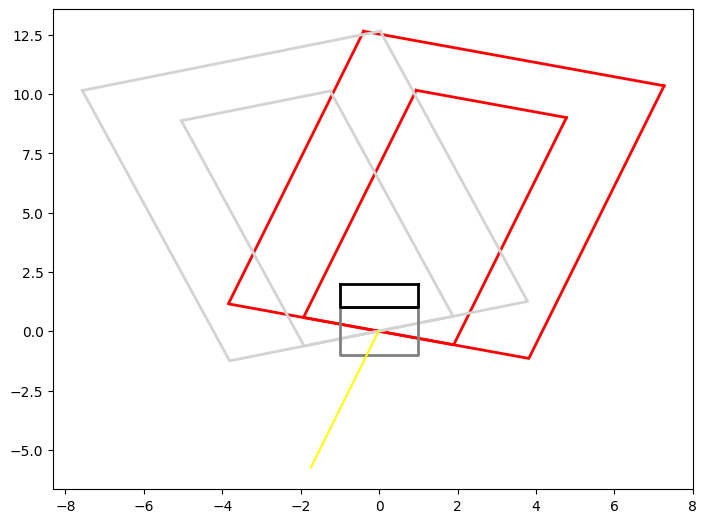

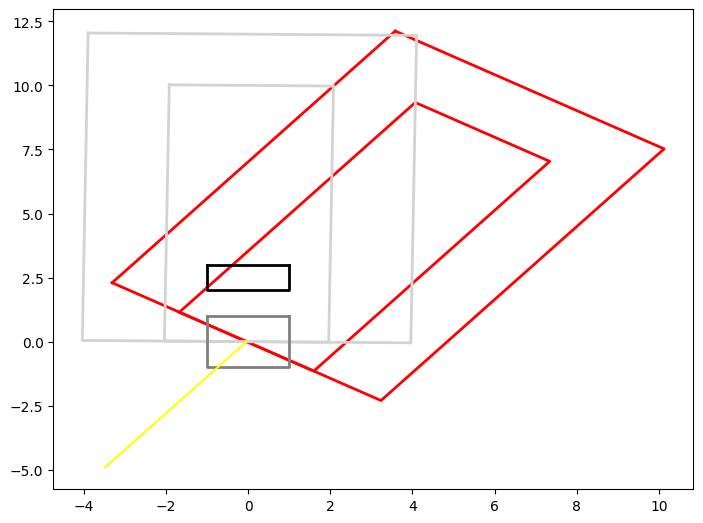

In [10]:
from typing import List
import numpy as np

s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 2, -1, 2, -1, 1])
import matplotlib.pyplot as plt
from utils import draw_solution

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))

sol = model(tf.convert_to_tensor([s1]))


def convert_sol(sol: List[tf.Tensor]) -> np.ndarray:
    s1, s2 = sol
    a, b, c, d = s1[0].numpy()
    i = np.argmax(s2[0])
    return np.array([a, i, b, c, d])


display(sol)
draw_solution(ax, s1.reshape(2, 8), convert_sol(sol))

s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 2, 1, 3, -1, 3, -1, 2])
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
sol = model(tf.convert_to_tensor([s1]))
draw_solution(ax, s1.reshape(2, 8), convert_sol(sol))


### Do the training



In [11]:

import math


class MyLoss(tf.keras.losses.Loss):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.mean = tf.keras.losses.MeanSquaredError()

    def call(self, y_true, y_pred):
        mean_vals = tf.gather(y_true, indices=[0, 2, 3, 4], axis=-1)
        cost = self.mean(mean_vals, y_pred)
        return cost


class MyLoss2(tf.keras.losses.Loss):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.logit = tf.keras.losses.CategoricalCrossentropy()

    def call(self, y_true, y_pred):
        cat_vals = tf.one_hot(tf.cast(y_true[:, 1], tf.int8), 5)
        cost = self.logit(cat_vals, y_pred)
        return cost


model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(
        learning_rate=tf.keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate=0.01,
                                                                     decay_steps=400,
                                                                     decay_rate=0.001)),
    loss=[MyLoss(), MyLoss2()],  #tf.keras.losses.MeanSquaredError(name="train_loss"),
)

BATCH_SIZE = 100


def split_input(inpts: np.ndarray, outs: np.ndarray, shuffle=True):
    indexes = np.arange(inpts.shape[0])
    if shuffle:
        np.random.shuffle(indexes)
    train_size = math.ceil(inpts.shape[0] * 9 / 10)
    train_indexes = indexes[0:train_size]
    test_indexes = indexes[train_size:-1]
    return (inpts[train_indexes], outs[train_indexes]), (inpts[test_indexes], outs[test_indexes])


(train_x, train_y), (test_x, test_y) = split_input(np.array(input_dataset),
                                                   np.array(output_dataset))
display(train_x.shape)
display(train_y.shape)


(900, 16)

(900, 5)

In [12]:

res = model.fit(x=train_x, y=train_y, batch_size=BATCH_SIZE, epochs=500,
                validation_data=(test_x, test_y))

Epoch 1/500


2024-01-18 12:28:29.680155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 21s 2s/step - loss: 43536.5586 - lambda_loss: 43361.9336 - softmax_loss: 174.6333 - val_loss: 16748.3457 - val_lambda_loss: 16712.3945 - val_softmax_loss: 35.9517
Epoch 2/500
9/9 [==============================] - 5s 534ms/step - loss: 6730.8750 - lambda_loss: 6703.1797 - softmax_loss: 27.6955 - val_loss: 4493.8535 - val_lambda_loss: 4466.1064 - val_softmax_loss: 27.7473
Epoch 3/500
9/9 [==============================] - 4s 430ms/step - loss: 1475.8540 - lambda_loss: 1470.2860 - softmax_loss: 5.5682 - val_loss: 1410.4883 - val_lambda_loss: 1410.4883 - val_softmax_loss: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 3s 363ms/step - loss: 655.0886 - lambda_loss: 654.6689 - softmax_loss: 0.4198 - val_loss: 219.2399 - val_lambda_loss: 216.5158 - val_softmax_loss: 2.7241
Epoch 5/500
9/9 [==============================] - 3s 356ms/step - loss: 142.3310 - lambda_loss: 138.7009 - softmax_loss: 3.6302 - val_loss: 132.3258 - val_lambda_loss: 

## Plot stats

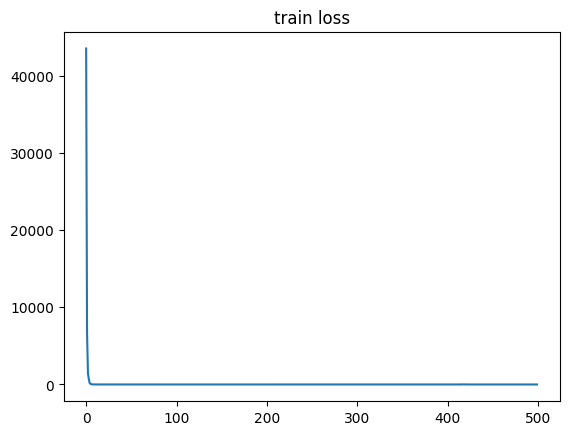

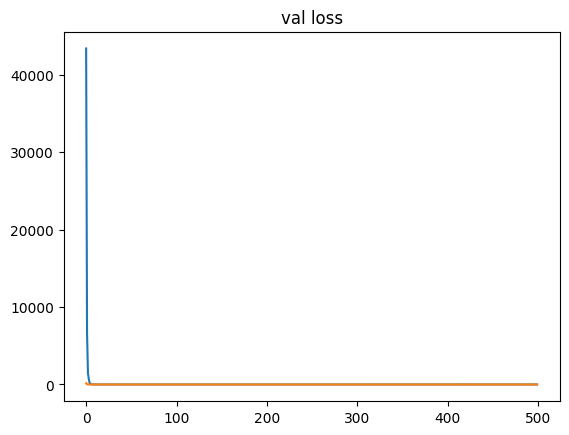

In [13]:
%matplotlib inline


plt.title("train loss")
plt.plot(res.history['loss'])
plt.show()
plt.title("val loss")
plt.plot(res.history['lambda_loss'])
plt.plot(res.history['softmax_loss'])
plt.show()

#### Some random tests

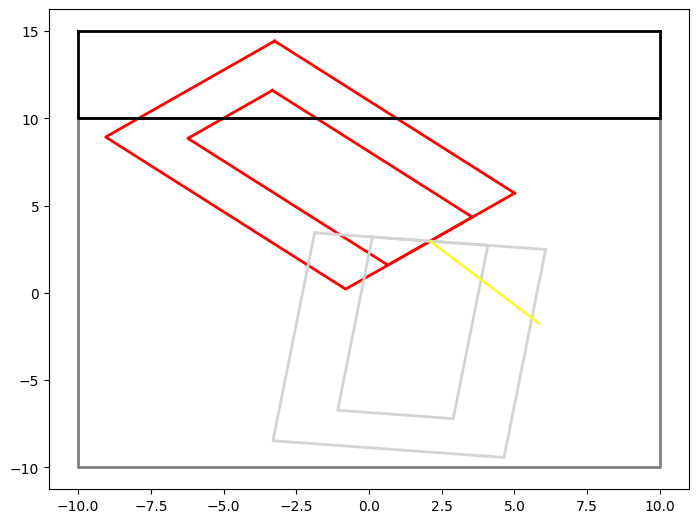

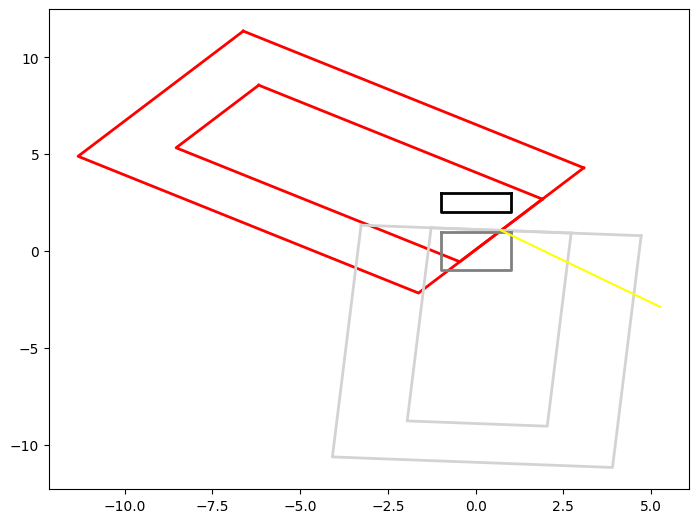

In [14]:
from typing import Callable

s1 = np.array([-10, -10, 10, -10, 10, 10, -10, 10, -10, 10, 10, 10, 10, 15, -10, 15])


def draw_one(model=model) -> Callable[[plt.Axes, np.ndarray], None]:
    def _draw_one(ax, sample):
        sol = model(tf.convert_to_tensor([sample]))
        draw_solution(ax, sample.reshape(2, -1), convert_sol(sol))

    return _draw_one


draw_sample = draw_one(model)

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_sample(ax, s1)
plt.show()

s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 2, 1, 3, -1, 3, -1, 2])
fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))
draw_sample(ax, s1)
plt.show()


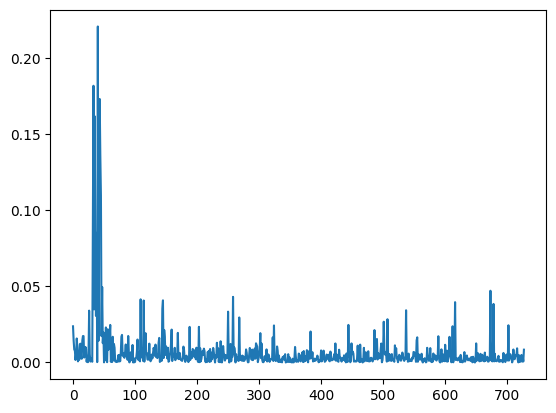

In [15]:
plt.plot(np.abs(model.weights[0].numpy()))

In [ ]:
output_2_layer

In [ ]:
model.save(datadir(MODEL_NAME))